# NE 630 - Lesson 5

**Note**: Please request a Beocat account at https://account.beocat.ksu.edu/.  We'll be using [OpenMC](https://docs.openmc.org/en/stable/) soon, and it lives on Beocat.

Reactor physics analysis is driven by *reaction rates* [reactions/(s cm$^3$)]:


$$
 \begin{split}
  R_t &=   \Sigma_t \phi
      = \left ( \sum_{i \in \text{nuclides}} \Sigma^i_t \right ) \phi  = \sum_{i \in \text{nuclides}} R^i_t \\
    &= \left ( \sum_{i \in \text{nuclides}} n_i \sigma^i_t \right ) \phi \\
    &= \left ( \sum_{i \in \text{nuclides}} n_i \sum_{x \in [e, \gamma, \ldots]} \sigma^i_x \right ) \phi \\
    &=  \left ( \sum_{i \in \text{nuclides}}\sum_{x \in [e, \gamma, \ldots]} \Sigma^i_x  \right ) \phi = \sum_{i} \sum_{x} R^i_x = \sum_{x} R_x
\end{split}
$$

Reaction cross sections $\sigma_x$ include
  
  - $\sigma_t$, total
  - $\sigma_e$, elastic scattering (both resonant and potential)
  - $\sigma_{in}$, inelastic scattering (often written $(n, n')$)
  - $\sigma_{\gamma}$, radiative capture (often written $(n, \gamma)$)
  - $\sigma_{f}$, fission (often written $(n, f)$)
  - $\sigma_{\alpha}$, $(n, \alpha)$ or $(n, a)$
  - $\sigma_{a} = \sigma_{\gamma} + \sigma_f + \sigma_{\alpha} + \ldots$, absorption, any process that removes neutron
  - $\bar{\nu}$ (**not** a reaction, but included in the data; average number of neutrons emittedf from fission)

Some useful probabilities:

 
  - $\frac{R_x}{R_t}$ = fraction of all reactions that are $x$ (this answers the question, "if a neutron interacts, what is the probability that $x$ is the interaction?")
  
  - $\frac{R^i_t}{R_t}$ = fraction of all reactions that are with nuclide $i$
  
  - $\frac{R^i_x}{R^i_t}$ = ??
  - $\frac{R^i_x}{R_x}$ = ??
  - $\frac{R_f}{R_a}$ = ??
  - $\bar{\nu}^{\text{U-235}} R_f^{\text{U-235}}$ = ??
  - $\displaystyle\frac{\bar{\nu}^{\text{U-235}} R_f^{\text{U-235}} + \bar{\nu}^{\text{U-238}} R_f^{\text{U-238}}}{R_f}$ = ??

# Getting and Using Cross-Section Data

All of the "raw" data lives in the ENDF/B format and is [distributed](https://www.nndc.bnl.gov/endf-b8.0/download.html) by Brookhaven National Laboratory (BNL).

However, we need processed data; an option is BNL's [Sigma](https://www.nndc.bnl.gov/sigma/).  To get data for a nuclide and reaction:

  1. Click on the element (on the periodic table)
  2. Click on the mass number (far right-hand side)
  3. Find the cross section needed (from several reactions) and click `Plot`
  4. Click on `View evaluated data`
  5. Click on `Text`
  6. Pick values, save the file, etc.

**Do Problems 1 and 2**

# Alternative: Using Python

For convenience, I've processed all the data needed for today into one CSV file hosted on Canvas.  Importantly, I've interpolated all of the data onto a common set of 20000 energy points (compare the number of points in elastic scattering for H-1 compared to $(n, \gamma)$ for U-238!)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

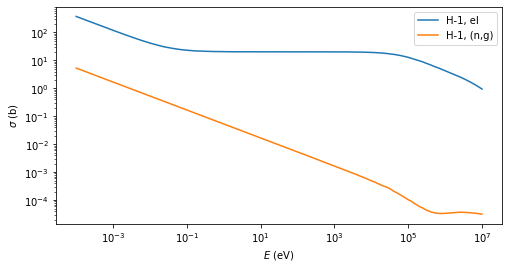

In [2]:
# Need to look at first row of CSV file for values
E, sig_H1_e, sig_H1_g = np.loadtxt("./cross_section_data/data.csv", # path to CSV
                                   skiprows=1, # skip the first row that has reaction names
                                   usecols=(0,8, 9), # get energy and sigma_e and sigma_g for H-1
                                   unpack=True, # return columns as three separate arrays
                                   delimiter=",") # columns are split by commas
plt.figure(figsize=(8,4))
plt.loglog(E, sig_H1_e, label="H-1, el")
plt.loglog(E, sig_H1_g, label="H-1, (n,g)")
plt.xlabel("$E$ (eV)")
plt.ylabel("$\sigma$ (b)")
plt.legend();

The CSV file can also be opened with Excel, MATLAB, etc.

**Do Problem 3**

In [4]:
# H1 - elastic @ 1 eV from the .txt file
E1, sig1 = 0.40461, 20.848
E2, sig2 = 1.68858, 20.2988
E = 1.0
sig_H1_el_1eV = ((E-E1)*sig2 + (E2-E)*sig1)/(E2-E1)
sig_H1_el_1eV
# H1 - (n,g) @ 1 MeV from the .txt file
E1, sig1 = 800000.0, 3.32443E-5
E2, sig2 = 2000000.0, 3.67662E-5
E = 1.0e6
sig_H1_g_1MeV = ((E-E1)*sig2 + (E2-E)*sig1)/(E2-E1)
print(sig_H1_el_1eV)
print(sig_H1_g_1MeV)

20.593330351955263
3.383128333333333e-05


In [5]:
# H1 - elastic @ 1 MeV from the .txt file
E1, sig1 = 850000.0, 4.63652
E2, sig2 = 1097760.0, 4.0527
E = 1.0e6
sig_H1_el_1MeV = ((E-E1)*sig2 + (E2-E)*sig1)/(E2-E1)

# H1 - (n,g) @ 1 eV from the .txt file
E1, sig1 = 0.826569, 0.0581121
E2, sig2 = 1.07619, 0.0509196
E = 1.0
sig_H1_g_1eV = ((E-E1)*sig2 + (E2-E)*sig1)/(E2-E1)
sig_H1_g_1eV
print(sig_H1_el_1MeV)
print(sig_H1_g_1eV)

4.283061007426542
0.05311491439662528


# A Look at B-10

**Do Problem 4**

In [6]:
E, sig_B10_a, sig_B10_d, sig_B10_e, sig_B10_g, sig_B10_in, sig_B10_p = \
    np.loadtxt("./cross_section_data/data.csv", skiprows=1, 
               usecols=(0,1,2,3,4,5,6),  unpack=True, delimiter=",") 

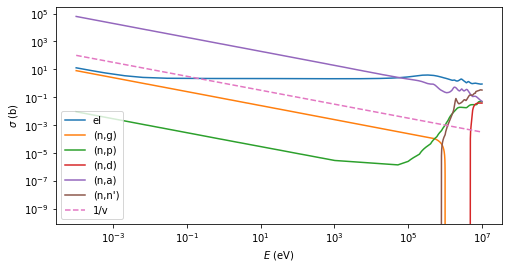

In [7]:
plt.figure(figsize=(8,4))
plt.loglog(E, sig_B10_e, label="el")
plt.loglog(E, sig_B10_g, label="(n,g)")
plt.loglog(E, sig_B10_p, label="(n,p)")
plt.loglog(E, sig_B10_d, label="(n,d)")
plt.loglog(E, sig_B10_a, label="(n,a)")
plt.loglog(E, sig_B10_in, label="(n,n')")
plt.loglog(E, 1/np.sqrt(E), "--", label="1/v")
plt.xlabel("$E$ (eV)")
plt.ylabel("$\sigma$ (b)")
plt.legend();

**Do Problem 5** (divide and conquer)

In [ ]:
# Here, I'm using the actual txt files from BNL sigma, so these
# numbers ought to be the same that you get by hand/calculator
for iso in ["U235", "U238"]:
    for x in ["t", "e", "g", "f", "nubar"]:
        for E in [1.0, 1e6]:
            fname = f"./cross_section_data/{iso}_{x}.txt"
            e, s = np.loadtxt(fname, skiprows=1, unpack=True, delimiter=",")
            print(f"{iso} {x:8} {E:.0e} {np.interp(E, e, s):.3e}")

**Do Problem 6**


In [ ]:
M_Zr_el = 0.515*90 + 0.112*91 + 0.171*92 + 0.174*94 + 0.028*96
M_Zr_el

In [ ]:
ρ_fuel = 7.1
U_frac = 0.085
N_a = 6.022e23 
n_ZrH1_6 = (1 - U_frac)*ρ_fuel * N_a / ( M_Zr_el + 1.6*1)
print(f" n_ZrH1_6 = {n_ZrH1_6:.4e} 1/cm^3")
print(f" n_ZrH1_6 = {1e-24*n_ZrH1_6:.4e} 1/b-cm")

In [ ]:
n_H1 = n_ZrH1_6*1.6
n_Zr90 = n_ZrH1_6 * 0.515
print(f" n_H1 = {n_H1:.4e} 1/cm^3")
print(f" n_Zr90 = {n_Zr90:.4e} 1/cm^3")

In [ ]:
M_U = 0.2*235 + 0.8*238
n_U = U_frac*ρ_fuel*N_a/(M_U)
n_U235 = 0.2*n_U
n_U238 = 0.8*n_U
print(f" n_U235 = {n_U235:.4e} 1/cm^3")
print(f" n_U238 = {n_U238:.4e} 1/cm^3")

In [ ]:
sig_e_U235 = 1.314e+01
sig_g_U235 = 1.040e+01 
sig_f_U235 = 6.777e+01
sig_a_U235 = sig_g_U235 + sig_f_U235
sig_t_U235 = 9.160e+01
sig_e_U238 = 9.085e+00
sig_g_U238 = 5.105e-01
sig_f_U238 = 2.963e-06
sig_a_U238 = sig_g_U238 + sig_f_U238
sig_t_U238 = 9.687e+00
sig_e_Zr = 6.0
sig_e_H1 = 20.593
sig_a_H1 = 0.0531
sig_t_H1 = sig_e_H1 + sig_a_H1

In [ ]:
# Part 6b
Sigma_e = (n_U235*sig_e_U235 + n_U238*sig_e_U238 + n_ZrH1_6*sig_e_Zr + n_H1*sig_e_H1)*1e-24
print(Sigma_e)
Sigma_a = (n_U235*sig_a_U235 + n_U238*sig_a_U238 + n_H1*sig_a_H1)*1e-24
print(Sigma_a)
Sigma_t = (n_U235*sig_t_U235 + n_U238*sig_t_U238 + n_ZrH1_6*sig_e_Zr + n_H1*sig_t_H1)*1e-24
print(Sigma_t)

In [ ]:
# Part 6c
Sigma_e/Sigma_t

In [ ]:
# Part 6d
Sigma_e_H1 = n_H1*sig_e_H1*1e-24
Sigma_e_H1/Sigma_e

In [ ]:
# Part 6e
1/Sigma_t

In [ ]:
# Part 6f
Sigma_f = (n_U235*sig_f_U235 + n_U238*sig_f_U238)*1e-24
Sigma_f/Sigma_a

In [ ]:
# Part 6g
nubar_U235 = 2.421e+00
nubar_U238 = 2.492e+00

Sigma_f_U235 = n_U235*sig_f_U235*1e-24
Sigma_f_U238 = n_U238*sig_f_U238*1e-24

(nubar_U235*Sigma_f_U235 + nubar_U238*Sigma_f_U238)/Sigma_f